In [11]:
import sys
# network generation makes use of the sypy-library
sys.path.append('./sypy')

import sypy

import networkx as nx

import numpy as np

import matplotlib.pyplot as plt

import random

from scipy.optimize import minimize

%matplotlib inline

global_seed = 42

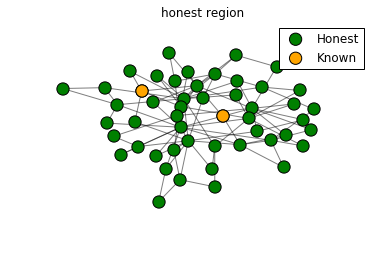

In [12]:
# honest graphs
honest_powerlaw_50 = sypy.PowerLawGraph(50, 2, .3, seed=global_seed)
honest_powerlaw_200 = sypy.PowerLawGraph(200, 2, .3, seed=global_seed)
honest_powerlaw_500 = sypy.PowerLawGraph(500, 2, .3, seed=global_seed)
honest_powerlaw_huge = sypy.PowerLawGraph(1000, 2, .3, seed=global_seed)
honest_cluster_gn_4 = sypy.GirvanNewmanCommunityGraph(num_comm=4, comm_size=50, avg_intercomm=1, 
                                                      seed=global_seed)
honest_cluster_lrf_8 = sypy.LFRCommunityGraph(num_comm=8, max_comm=100, comm_exp=1.5, max_degree=10, 
                                              degree_exp=1.5, mixing_par=0.075, tries=3, seed=global_seed)
honest_small_complete = sypy.CompleteGraph(5)
small_world = sypy.SmallWorldGraph(9, 4, .8)

# honest region
honest_region = sypy.Region(
    graph = honest_powerlaw_50,
    name = "honest region",
    is_sybil = False
)
honest_region.pick_random_honest_nodes(num_nodes=2)
# honest_region.pick_connected_random_honest_nodes(num_nodes=10)
honest_region.visualize()


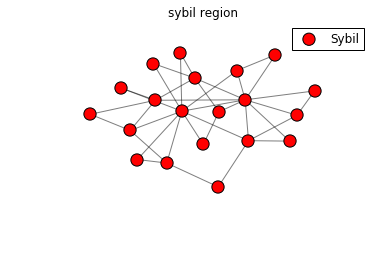

In [13]:
# sybil graphs
sybil_complete_20 = sypy.CompleteGraph(20)
sybil_powerlaw_20 = sypy.PowerLawGraph(20, 2, .3, seed=global_seed)
sybil_powerlaw_50 = sypy.PowerLawGraph(50, 2, .3, seed=global_seed)
sybil_powerlaw_500 = sypy.PowerLawGraph(500, 2, .3, seed=global_seed)
sybil_powerlaw_huge = sypy.PowerLawGraph(500, 2, .3, seed=global_seed)
sybil_cluster_gn_3 = sypy.GirvanNewmanCommunityGraph(num_comm=3, comm_size=20, avg_intercomm=1, 
                                                     seed=global_seed)
sybil_cluster_lrf_4 = sypy.LFRCommunityGraph(num_comm=4, max_comm=50, comm_exp=1.5, max_degree=10, 
                                              degree_exp=1.5, mixing_par=0.08, tries=3, seed=global_seed)
sybil_small_complete = sypy.CompleteGraph(4)

sybil_region = sypy.Region(
    graph = sybil_powerlaw_20,
    name = "sybil region",
    is_sybil = True
)
sybil_region.visualize()

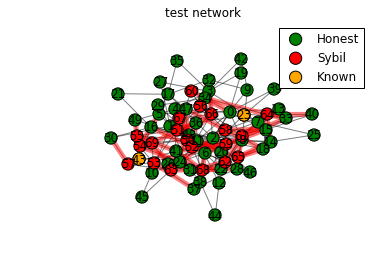

In [14]:
test_network = sypy.Network(honest_region, sybil_region, "test network")
test_network.random_pair_stitch(50)
dist = 1 / np.sqrt(test_network.get_network_stats().order)
test_network.visualize(k=dist*2, labeled=True)

In [15]:
graph = test_network.graph.structure
all_positives = range(test_network.left_region.graph.order())
positives = np.random.choice(all_positives, 5, replace=False)
#positives = [0, 1, 2, 3, 4, 5]
all_negatives = range(test_network.left_region.graph.order(), test_network.right_region.graph.order() 
                  + test_network.left_region.graph.order())
negatives = np.random.choice(all_negatives, 5, replace=False)

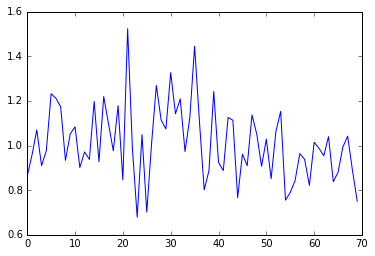

 anzahl: 70
ROC-AUC: 0.705


In [27]:
import SybilRank as sr
from sklearn.metrics import roc_auc_score
%reload_ext autoreload
%autoreload 2

sybilRank = sr.SybilRanker(graph, positives, num_iterations=6, deg_norm=True, total_ranking=1)

sybilRank.rank()
ranking = sybilRank.ranking

deg_dict = graph.degree()
deg = np.fromiter(iter(deg_dict.values()), dtype=float)
norm_deg = deg / deg.sum()


plt.plot(ranking)
plt.show()

print 'anzahl:', test_network.graph.order()

true_labels = np.ones(test_network.graph.order())
true_labels[all_negatives] = 0

print 'ROC-AUC:', roc_auc_score(true_labels, ranking)


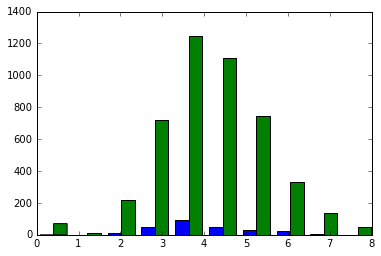

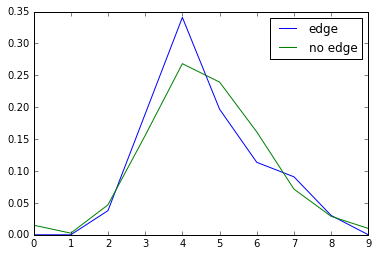

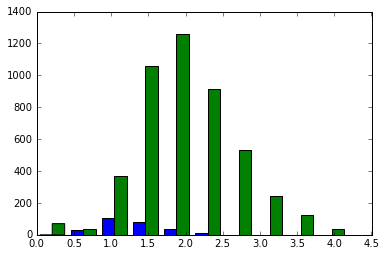

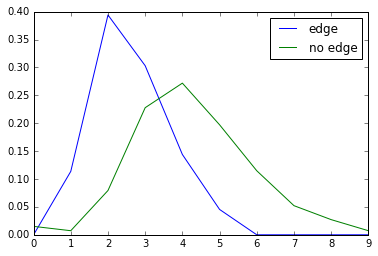

['correlated_feature0start', 'correlated_feature0end', 'correlated_feature1start', 'correlated_feature1end', 'correlated_feature2start', 'correlated_feature2end', 'correlated_feature3start', 'correlated_feature3end', 'correlated_feature4start', 'correlated_feature4end', 'correlated_feature5start', 'correlated_feature5end', 'correlated_feature6start', 'correlated_feature6end', 'correlated_feature7start', 'correlated_feature7end', 'random0', 'random1', 'random2', 'random3', 'random4', 'random5', 'random6', 'random7', 'random8', 'random9', 'random10', 'random11', 'random12', 'random13', 'random14', 'random15', 'random16', 'random17', 'random18', 'random19']


In [17]:
import FeatureGenerator as fg

network_fg = fg.NetworkFeatureGenerator()

feature_list = network_fg.add_edge_correlated_feature(test_network, plot=True, stay_factor=10, iterations=4)

random_features = network_fg.add_random_features(test_network, dim=20)
feature_list += random_features
print feature_list

res    status: 0
  success: True
     njev: 105
     nfev: 3990
 hess_inv: array([[ 0.65157382, -0.08111596,  0.04627518, ..., -0.08252633,
        -0.02220188,  0.00930042],
       [-0.08111596,  0.66757636, -0.02985999, ..., -0.04944257,
        -0.02189897, -0.03899741],
       [ 0.04627518, -0.02985999,  0.83738272, ...,  0.04400405,
         0.05805535,  0.02135965],
       ..., 
       [-0.08252633, -0.04944257,  0.04400405, ...,  0.80784953,
        -0.10075145,  0.03602912],
       [-0.02220188, -0.02189897,  0.05805535, ..., -0.10075145,
         0.88610162, -0.02759809],
       [ 0.00930042, -0.03899741,  0.02135965, ...,  0.03602912,
        -0.02759809,  0.89234811]])
      fun: 0.03389656259295122
        x: array([ 0.07720269,  0.03902854, -0.00710214,  0.01829209, -0.00565652,
        0.00487878,  0.02344582, -0.01443605,  0.04862653,  0.07083313,
       -0.0336277 ,  0.01003779, -0.08275806, -0.13298602, -0.00478339,
        0.04500472, -0.03656463,  0.0128971 ,  0.0126

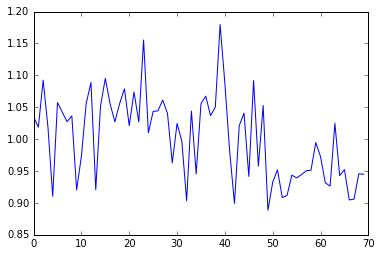

In [28]:
import SupervisedRandomWalk as srw
super_walker = srw.SRWEarlyStopping(graph, feature_list, positives, positives, negatives,
                 strength_function='logistic', loss_function='hinge_loss', loss_factor=10,
                regularization_factor=.5, iteration_stop=20, deg_norm=True, total_ranking=1)
init_w = np.random.rand(len(feature_list))
super_walker.update_weight(init_w)
super_walker.train()
super_ranking = super_walker.rank()
plt.plot(super_ranking)

true_labels = np.ones(test_network.graph.order())
true_labels[all_negatives] = 0

print 'ROC-AUC:', roc_auc_score(true_labels, super_ranking)